## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Reading data

In [2]:
train_df = pd.read_pickle('/content/drive/MyDrive/Project/train_preprocessed.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/Project/test_preprocessed.pkl')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms,BsmtBathrooms
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,3,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,3,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,3,1


ID is not useful in predicting the saleprice, so the first step is to get rid of Id from both train and test data sets

In [4]:
train_df = train_df.drop(['Id'], axis=1)
test_df = test_df.drop(['Id'], axis=1)

Finding correlation between columns and the target variable

In [5]:
corr = train_df.corr()
corr['SalePrice'][:].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.612166
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.473461
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
GarageYrBlt      0.261366
BsmtUnfSF        0.214198
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

Observations

*   We can observe that the target variable is more dependent on GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF.
*   The month, year in which the house was sold does not have high impact on the SalePrice.
*   Suprisingly, lotArea and lotFrontage does not have high correlation with the target variable.





## Function to create plots

In [6]:
def plot_feature(data, column):
  '''
  Make plots for 'column'
  Left: Distribution of feature
  Right: Dependance of sale price on the feature
  '''
  sns.set_style('whitegrid')
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)

  order = data.groupby(by=[column])['SalePrice'].mean().sort_values().index

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.histplot(data[column], kde=True)
  else:
    sns.countplot(x=column, 
                  data=data,
                  order=order) 
                  #order=data[column].value_counts().index)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=45)
  plt.ylabel('Count', fontsize=14)

  
  plt.subplot(1, 2, 2)

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.regplot(x=column, 
                y='SalePrice', 
                data=data,
                scatter_kws={'alpha':0.2})
  else:
    sns.boxplot(x = column,
                y = 'SalePrice', 
                data=data,
                order = order)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=45)
  plt.ylabel('Sale Price', fontsize=14)
  plt.subplots_adjust(wspace=.4)
  plt.show()

## EDA on columns related to bath

*   Bathrooms
*   BsmtBathrooms
*   BsmtFullBath
*   BsmtHalfBath
*   FullBath
*   HalfBath

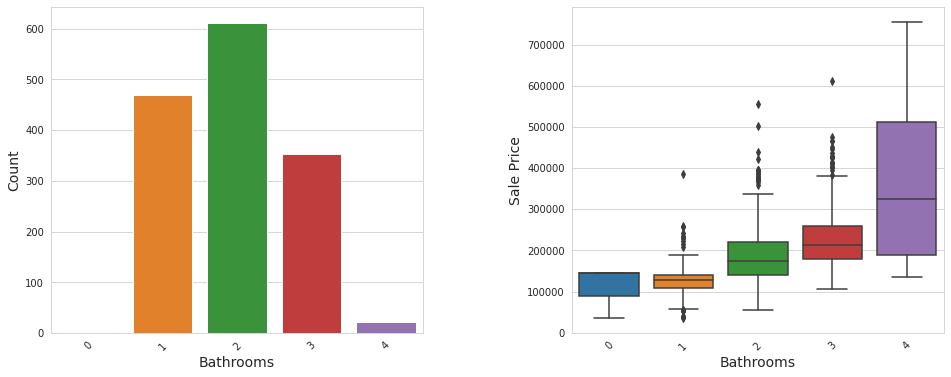

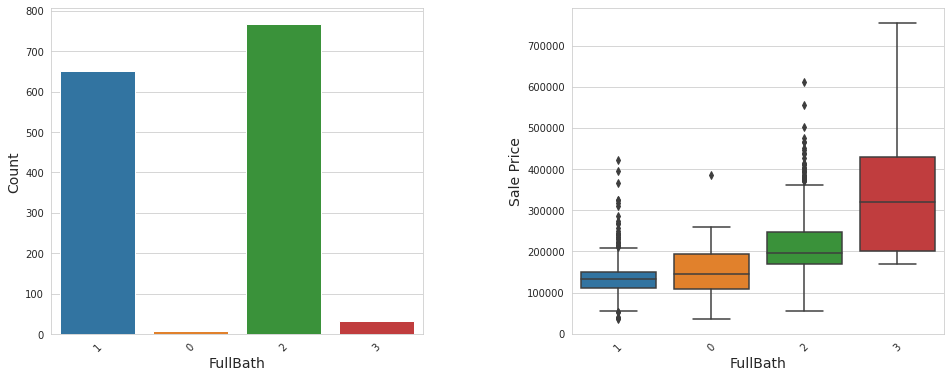

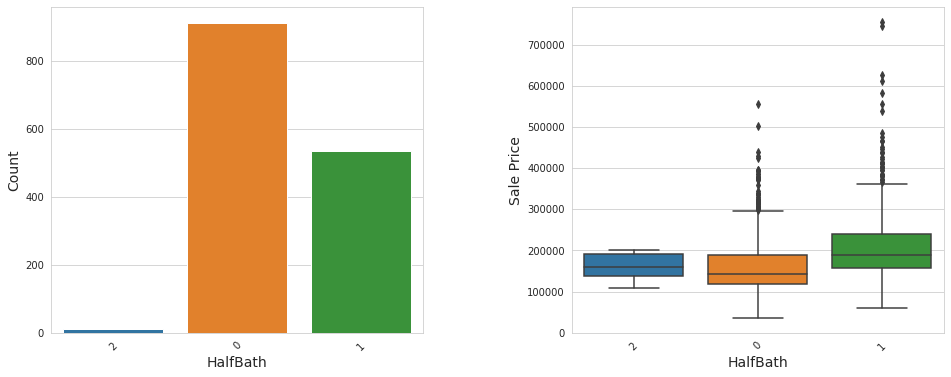

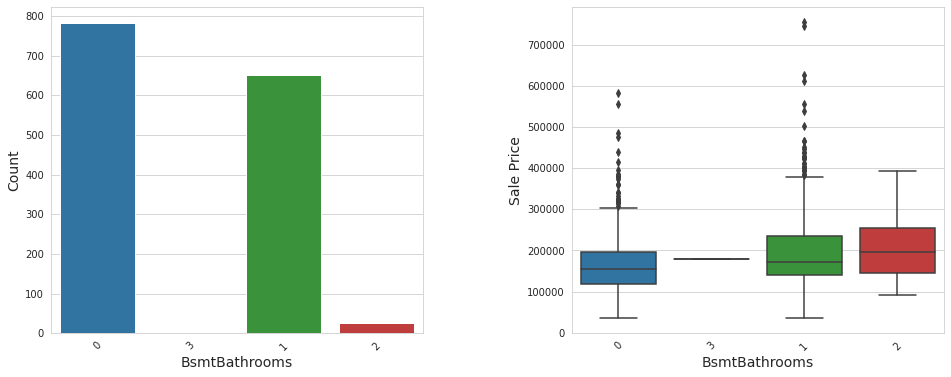

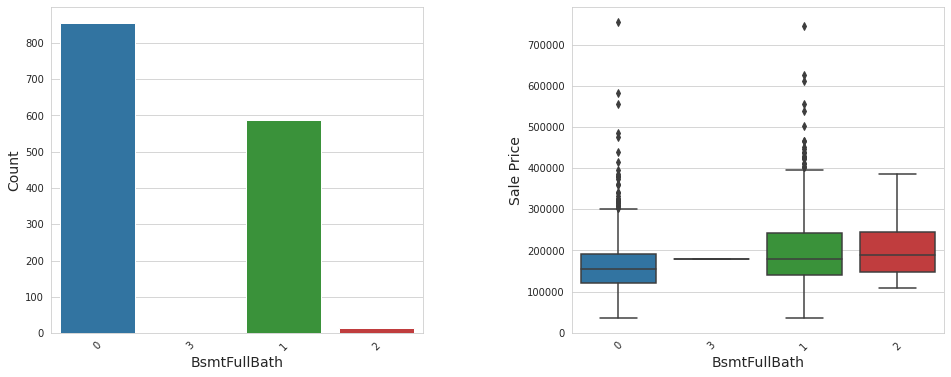

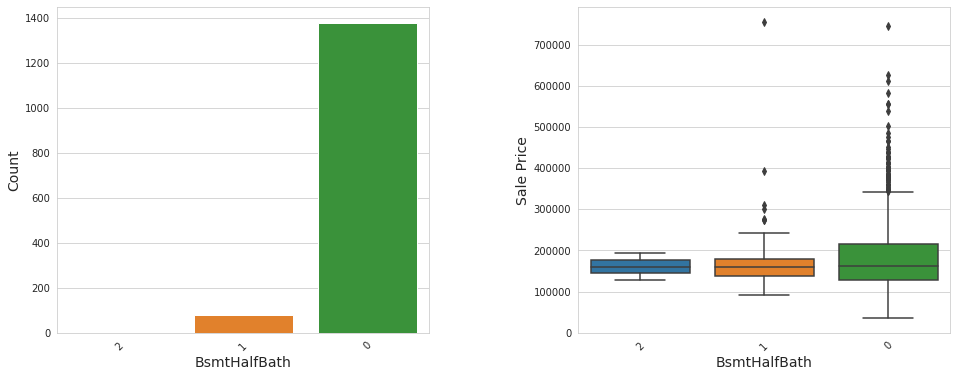

In [7]:
bath = ['Bathrooms', 'FullBath', 'HalfBath', 'BsmtBathrooms', 'BsmtFullBath', 'BsmtHalfBath']
for col in bath:
  plot_feature(train_df, col)

**Observations**:

We can observe that the new columns Bathrooms and BsmtBathrooms are able to give us the information which we are getting from other 4 columns.

So, while feature engineering we drop the other 4 columns as they are redundant.

## EDA on columns related to Garage

*   GarageFinish
*   GarageCars
*   GarageQual
*   GarageCond
*   GarageType

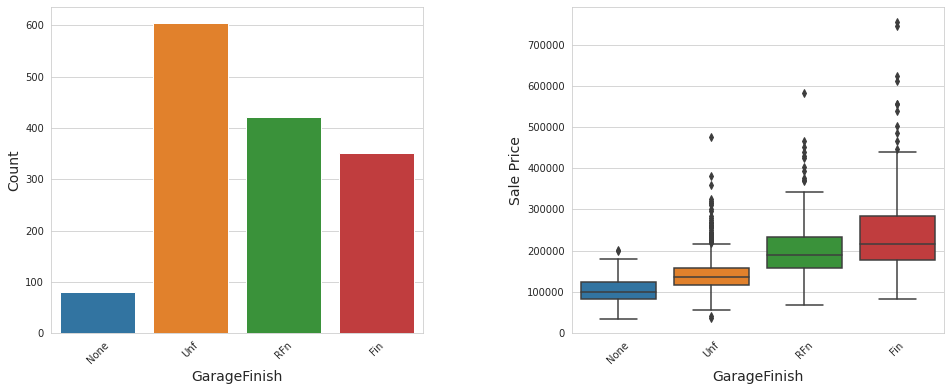

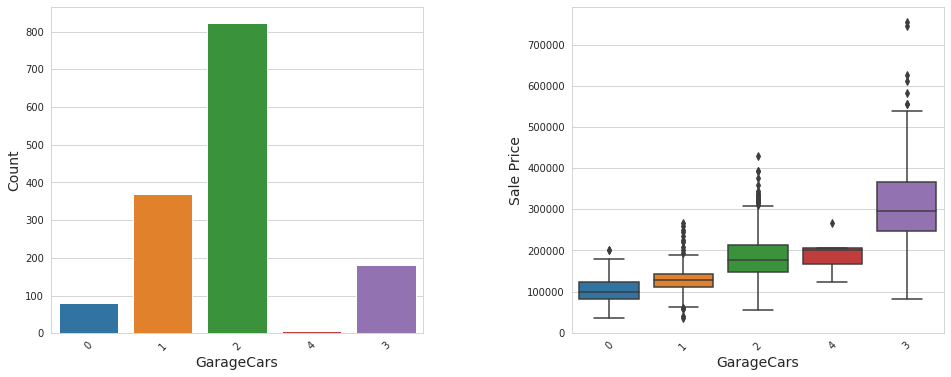

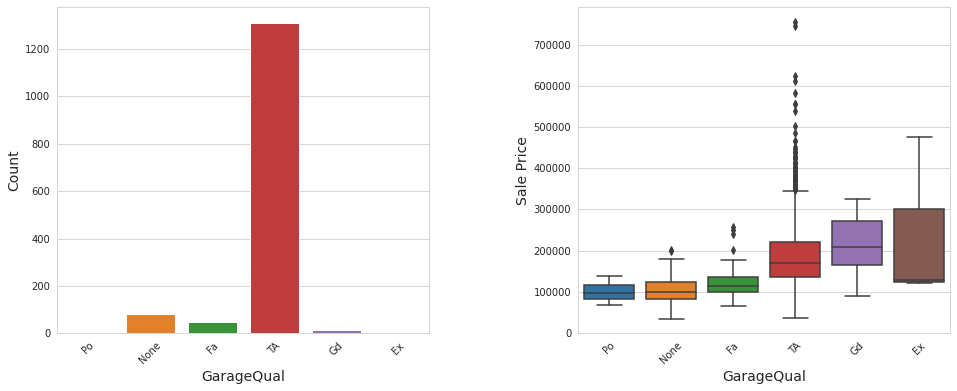

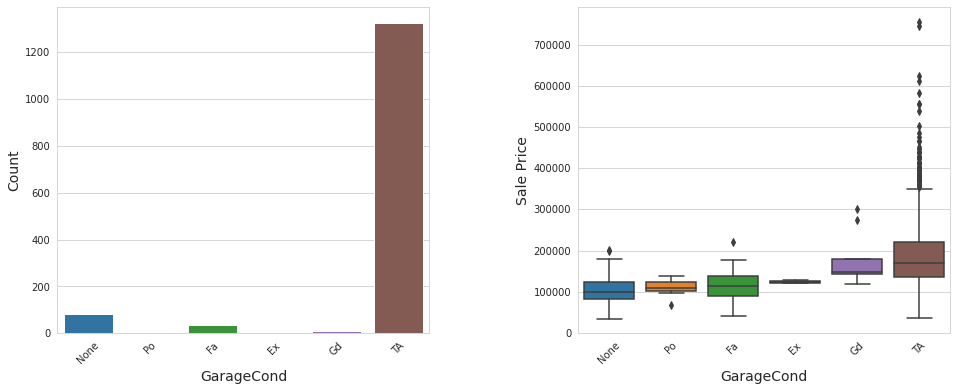

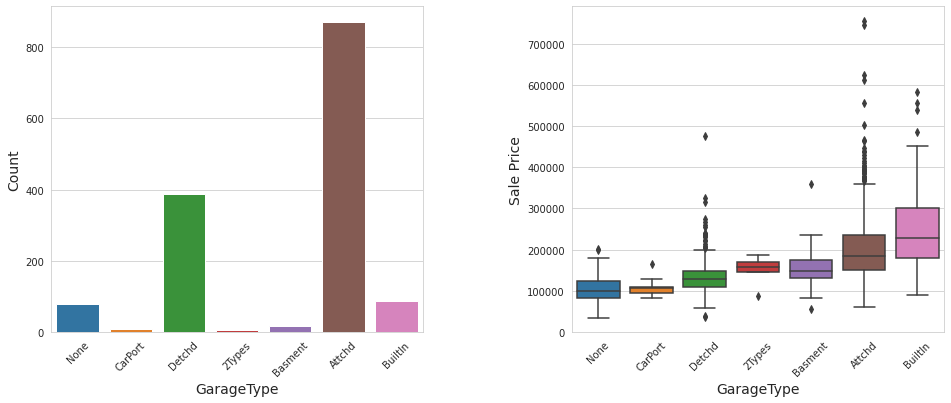

In [8]:
garageCols = ['GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'GarageType']
for col in garageCols:
  plot_feature(train_df, col)

Observations:

*   Majority of the garages have 2 car capacity
*   Quality of most of the garages is Typical / Average
*   59% of garages are of type Attached


## EDA on columns related to basement

*   BsmtExposure
*   BsmtFinType1
*   BsmtFinType2
*   BsmtQual



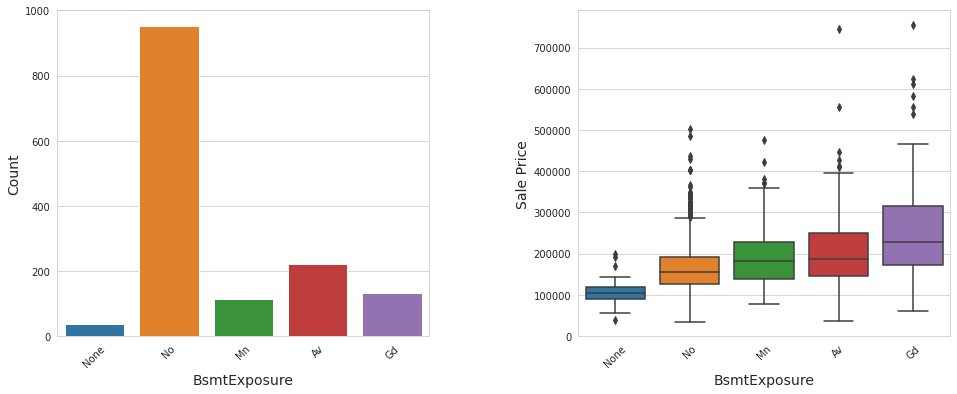

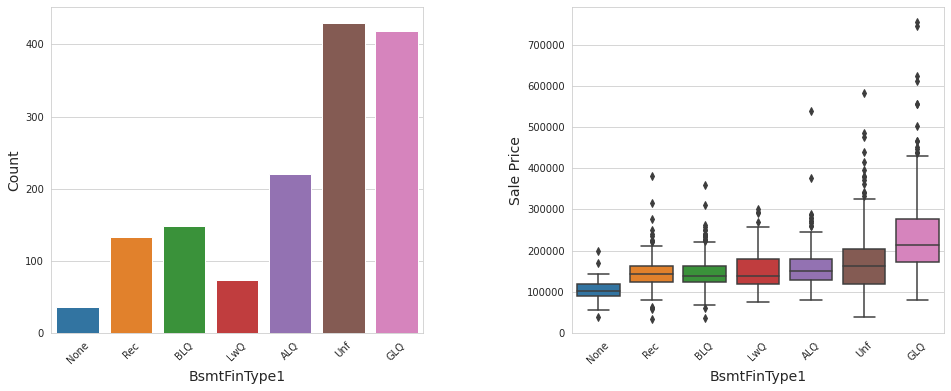

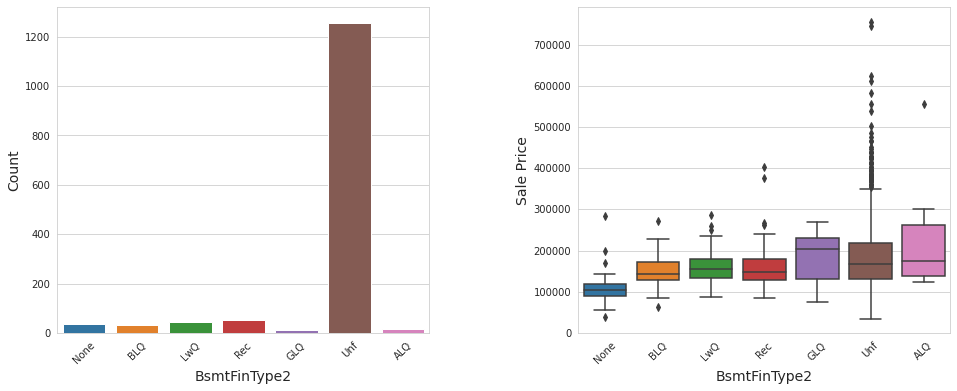

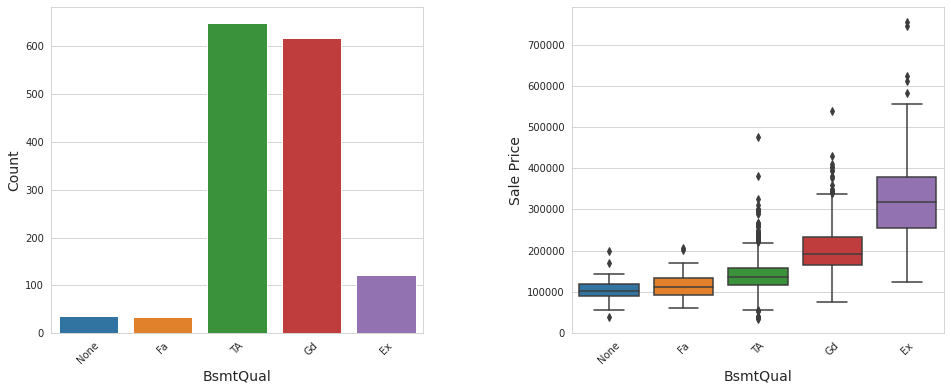

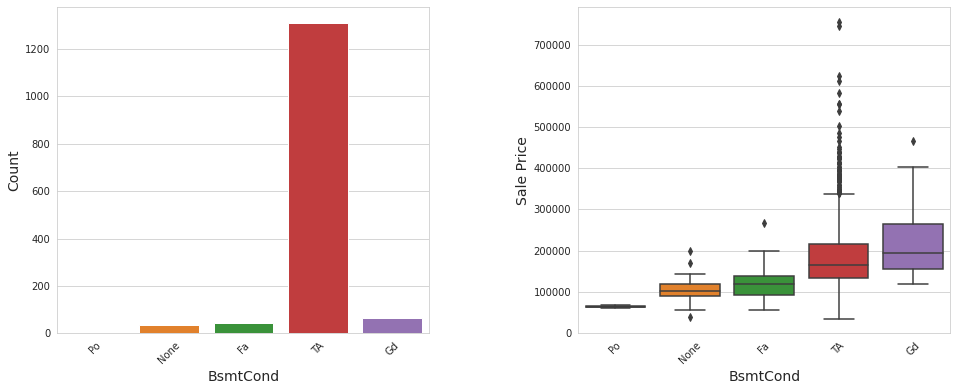

In [9]:
bsmtCols = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']
for col in bsmtCols:
  plot_feature(train_df, col)

Observations:

*   As the basement exposure, quality and condition increases the price also increases
*   Majority of the basements are in typical/ avergae condition and most of them does not have walkout or garden level walls.
*   BsmtFinType does not have much impact on the Sale Price, so, we can drop these columns during feature engineering.



## EDA on rooms above grade

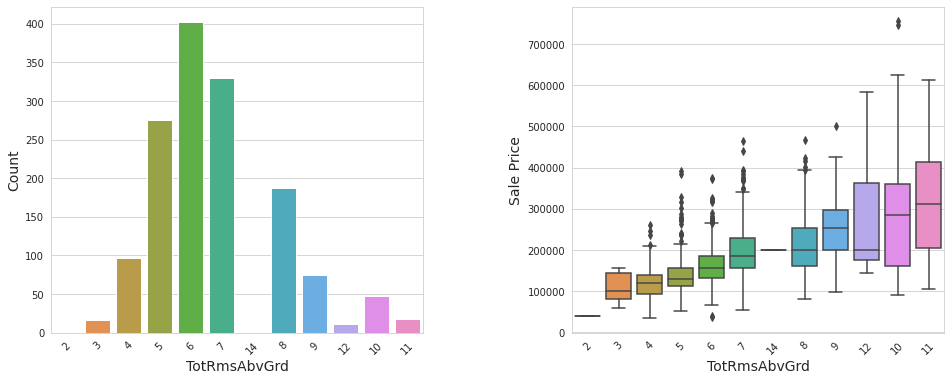

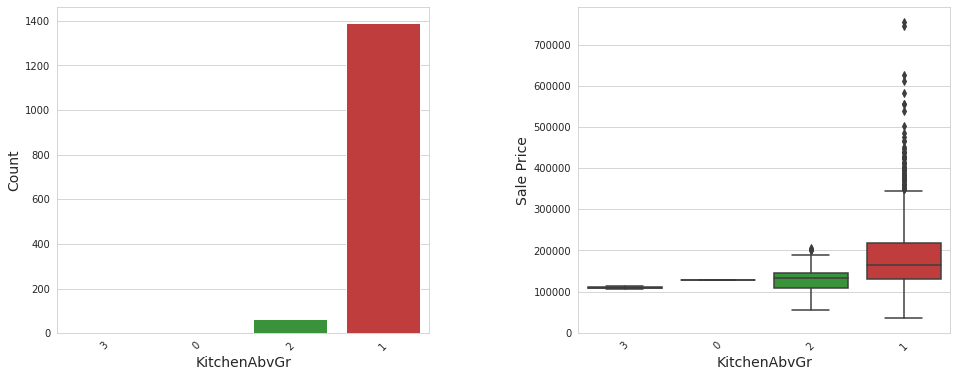

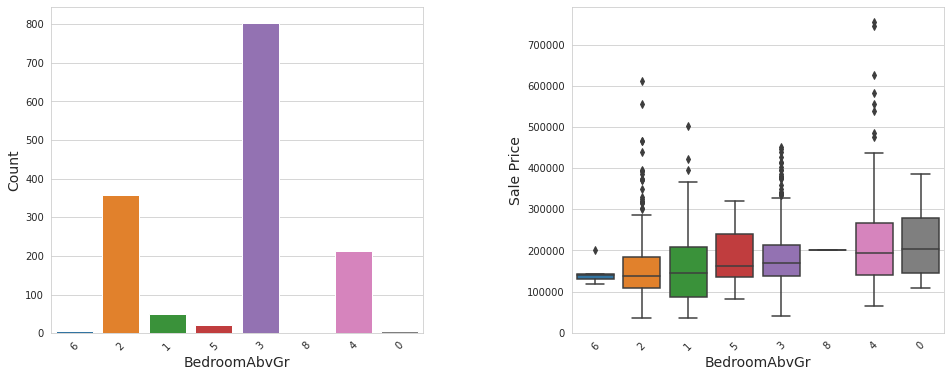

In [10]:
cols = ['TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr']
for col in cols:
  plot_feature(train_df, col)

Observations:


*   We can see a clear relationship between the total number of rooms above grade and the sales price. The sales price increases as the total number of rooms increases.
*   More number of houses have one kitchen above grade and the average sale price for houses with one kitchen is more than the houses with more than one kitchen.
*   There is no clear relationship between the BedroomAbvGr and sale price.



## EDA on heating and air conditions

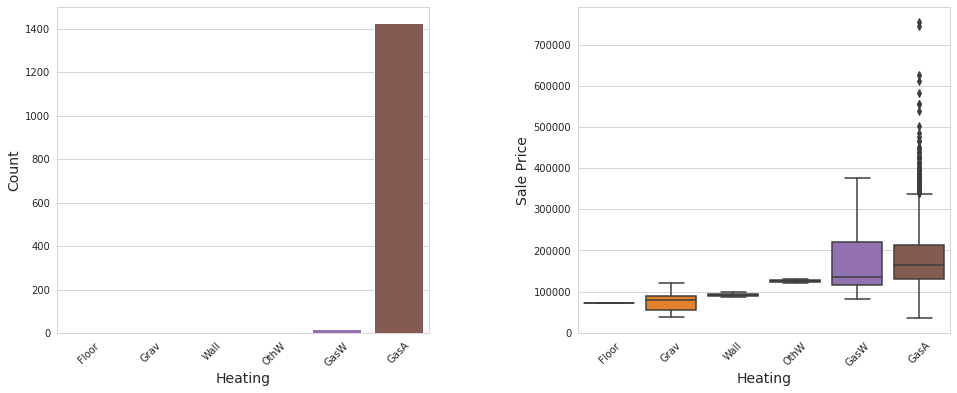

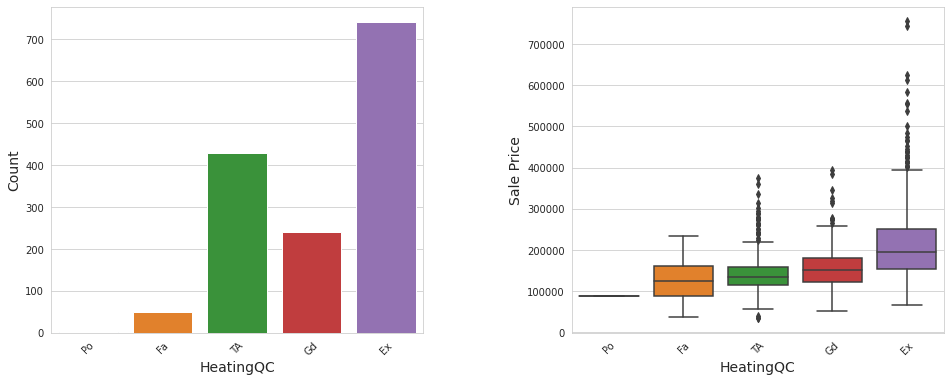

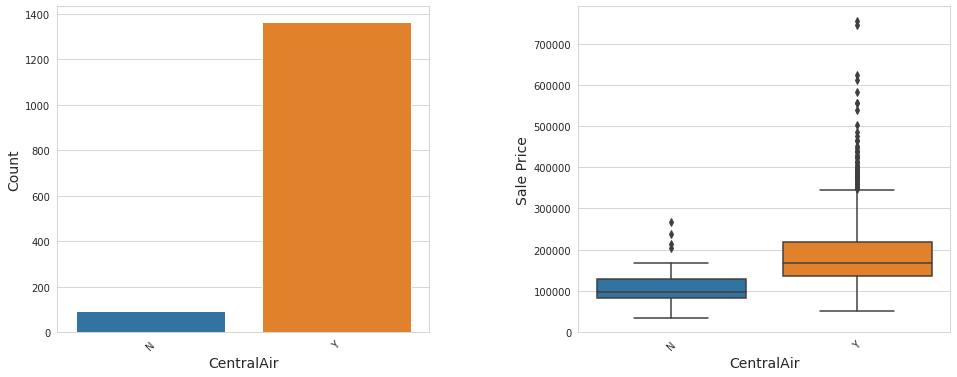

In [11]:
temprCols = ['Heating', 'HeatingQC', 'CentralAir']
for col in temprCols:
  plot_feature(train_df, col)

Observations:


*   Heating column have 6 different attributes, and almost 97% of the houses have Heating type GasA.
*   Dropping Heating column while feature engineering will help in reducing dimentionality as the data available is of only 1 type and this will not help in predicting the Sale Price.
*   Houses that have CentralAir have high Sale Price.

## EDA on other categorical columns

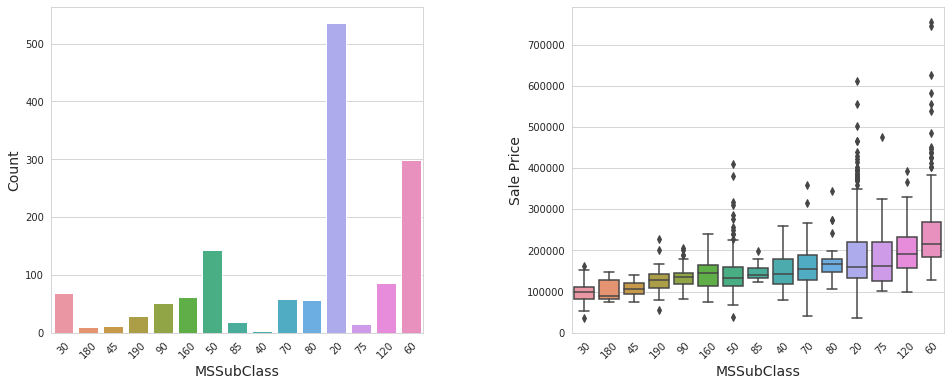

In [12]:
plot_feature(train_df, 'MSSubClass')

Observation:


*   Most of the buildings are either 1-story or 2-story and newer styles
*   Sales price is higher for newer buildings



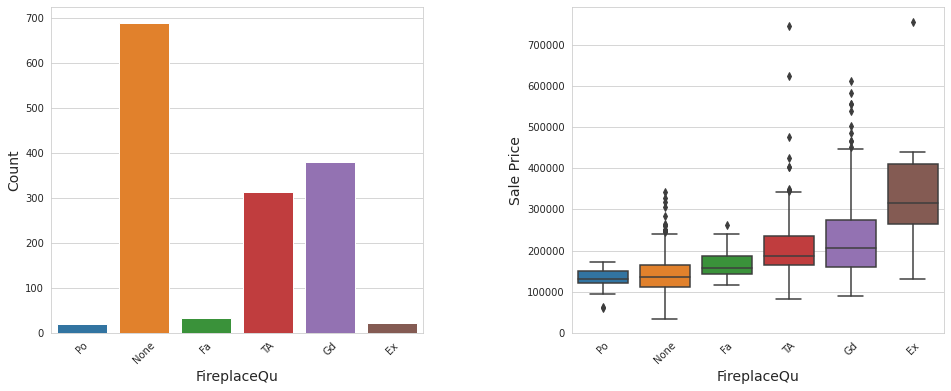

In [13]:
plot_feature(train_df, 'FireplaceQu')

Observations:


*   Most of the houses does not have fire place.
*   The houses with excellent fire place costs more.

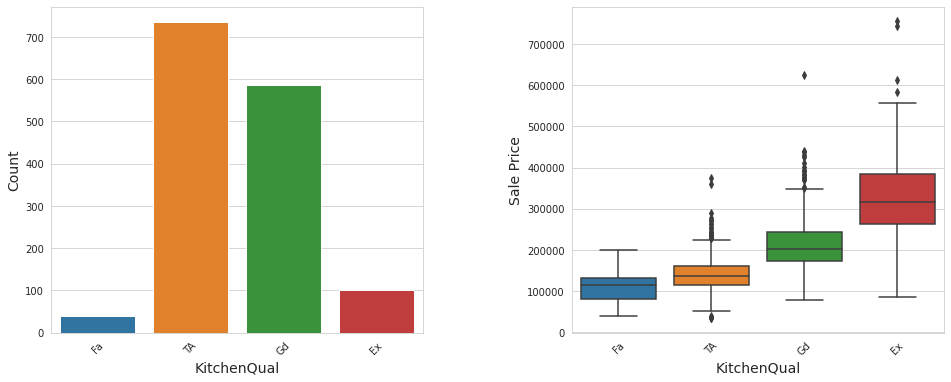

In [14]:
plot_feature(train_df, 'KitchenQual')

Observation:


*   90% of the houses have good or average Kitchen quality
*   As the kitchen quality increases the Sale Price also increase.

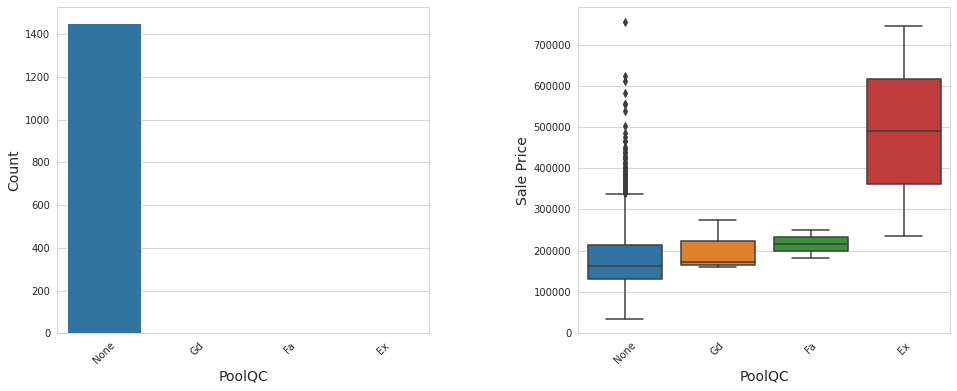

In [15]:
plot_feature(train_df, 'PoolQC')

Observation:


*   99.5% of the houses does not have Pool
*   The value of house with an excellent pool is approximately more than 50% of the cost of the house with no pool



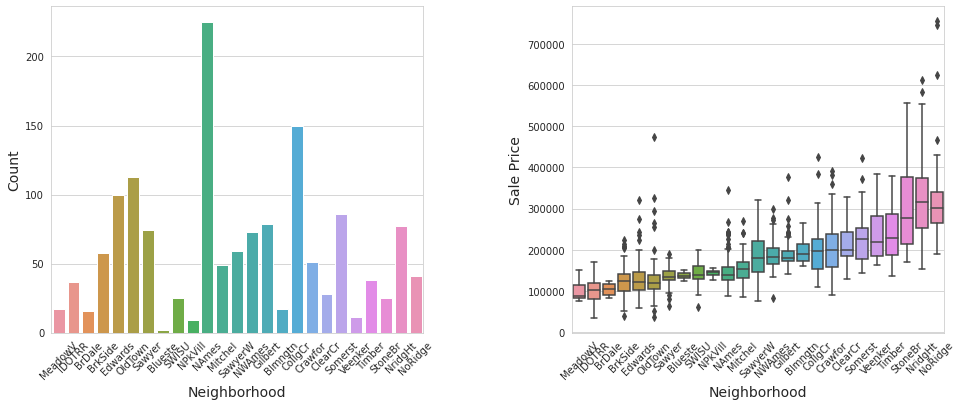

In [16]:
plot_feature(train_df, 'Neighborhood')

Observations:



*   Almost 15% of the houses are in neighborhood **NAmes**
*   Neighborhood NridgHt has highest mean Sale Price

In [17]:
houses_sold_yr_month_df = pd.DataFrame({'count' : train_df.groupby(by=['YrSold', 'MoSold']).size()}).reset_index()

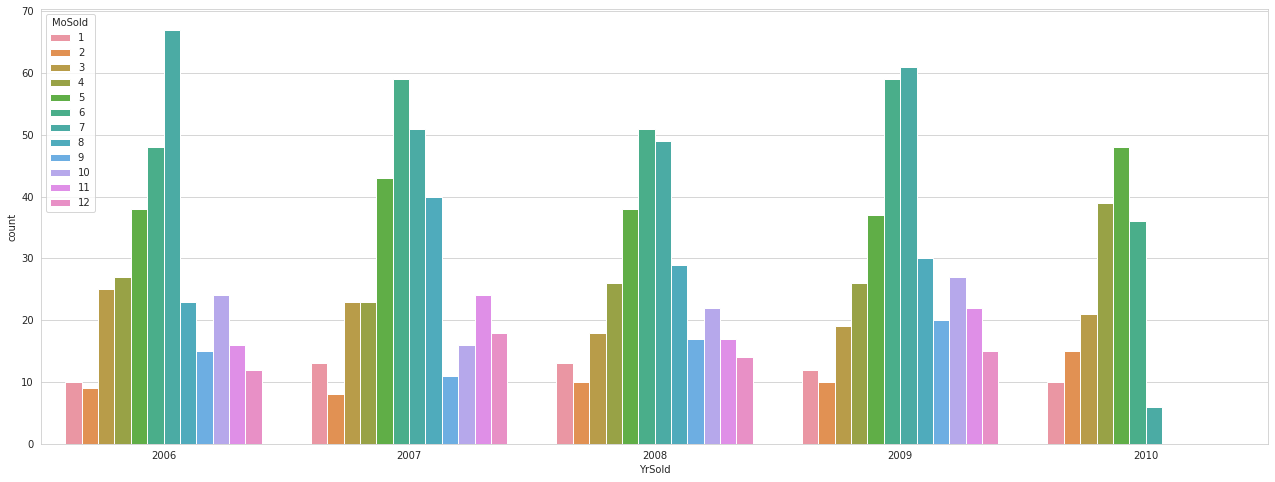

In [18]:
plt.figure(figsize=(22, 8))
sns.barplot(x='YrSold', y='count', hue='MoSold', data=houses_sold_yr_month_df)
plt.show()

Observations:


*   Evey year except 2010, the sales are high in the months of June and July


   

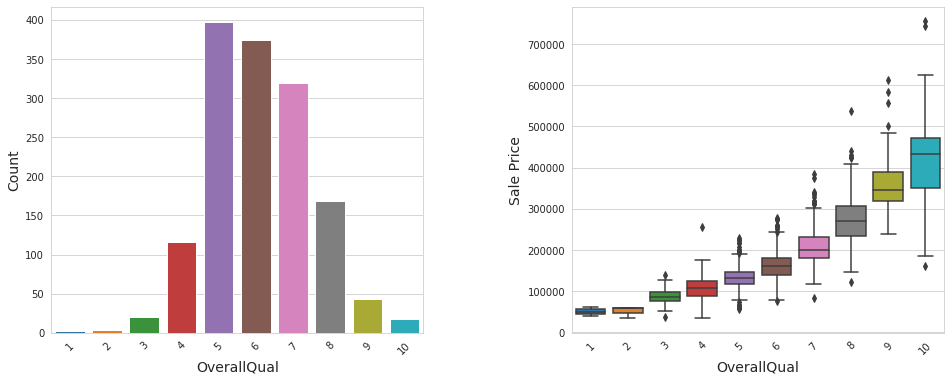

In [19]:
plot_feature(train_df, 'OverallQual')

Observations:


*   As the overal quality increases, the Sales price also increases.   

## EDA on numerical columns

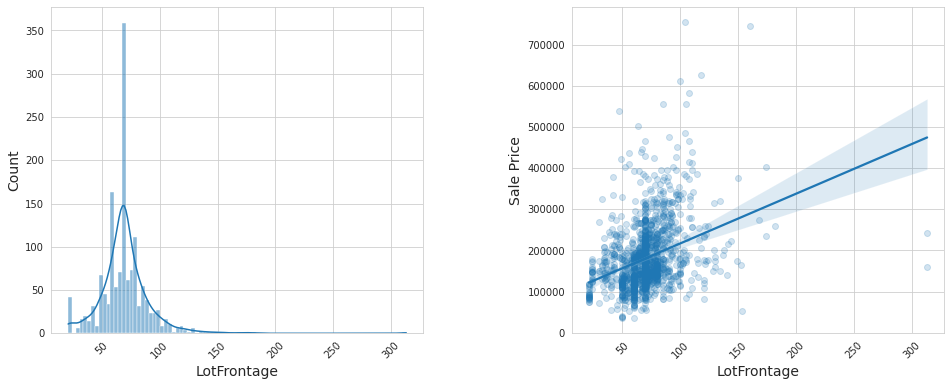

In [20]:
plot_feature(train_df, 'LotFrontage')

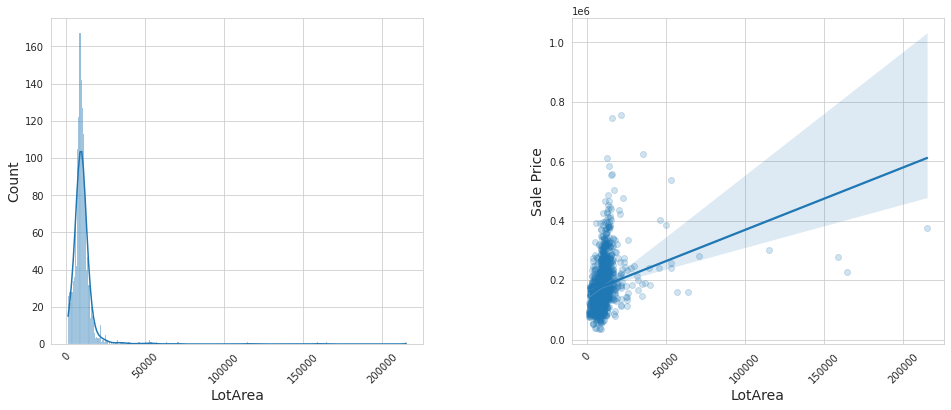

In [21]:
plot_feature(train_df, 'LotArea')

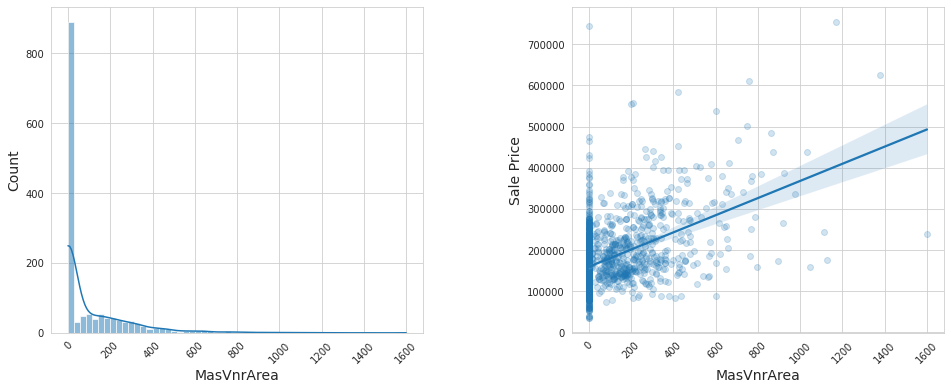

In [22]:
plot_feature(train_df, 'MasVnrArea')

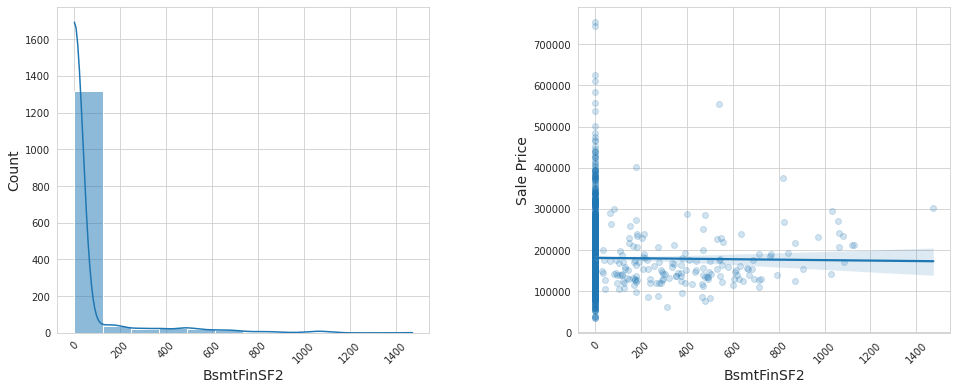

In [23]:
plot_feature(train_df, 'BsmtFinSF2')

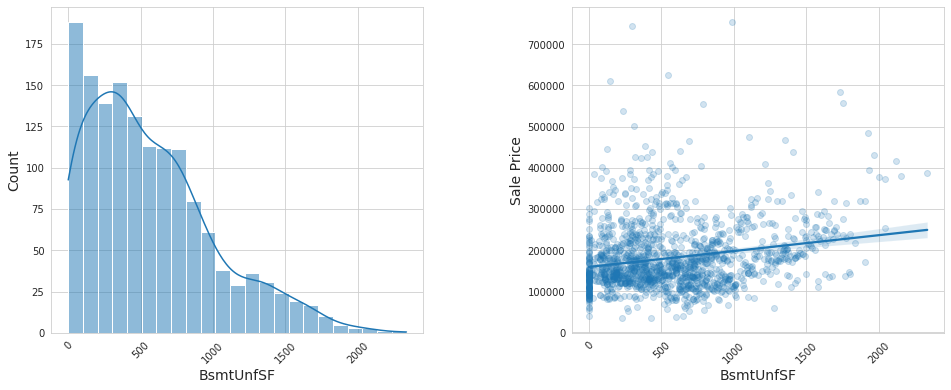

In [24]:
plot_feature(train_df, 'BsmtUnfSF')

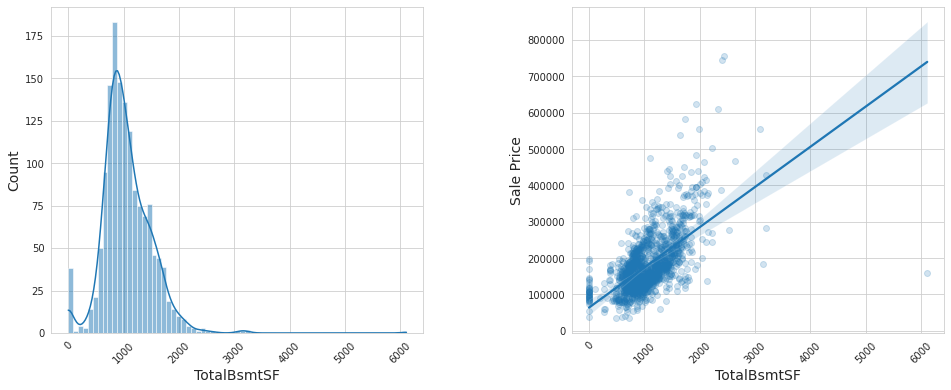

In [25]:
plot_feature(train_df, 'TotalBsmtSF')

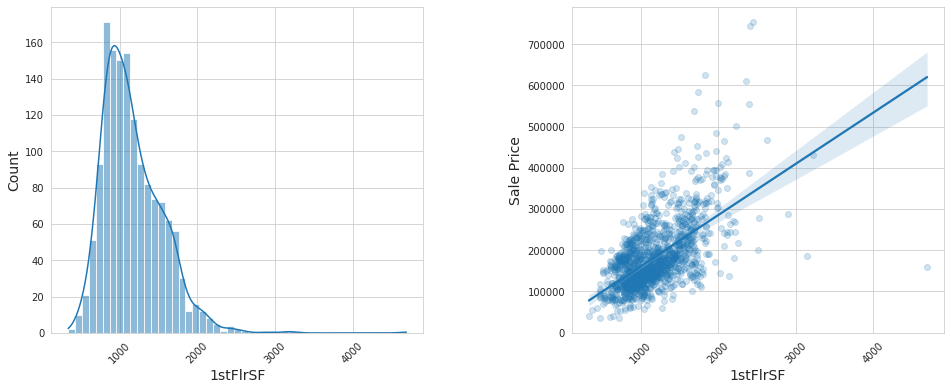

In [26]:
plot_feature(train_df, '1stFlrSF')

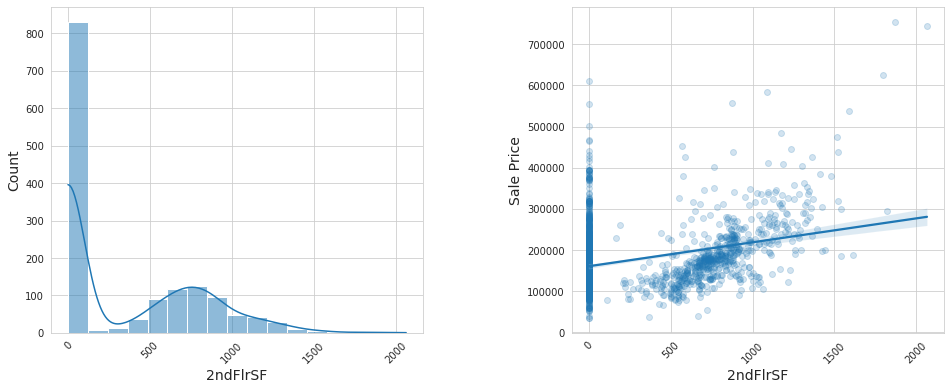

In [27]:

plot_feature(train_df, '2ndFlrSF')

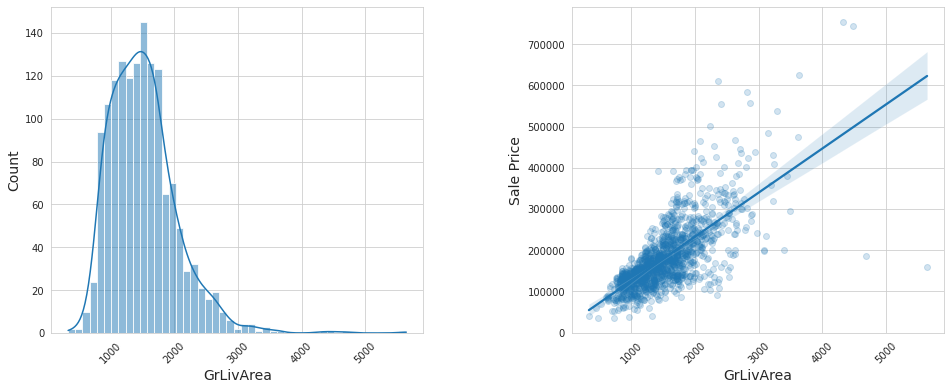

In [28]:
plot_feature(train_df, 'GrLivArea')

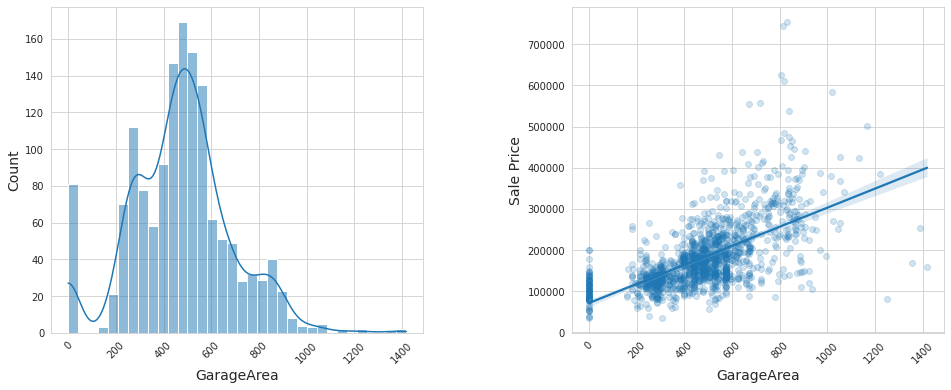

In [29]:
plot_feature(train_df, 'GarageArea')

Observations:



*   Total basement surface area impacts the Sales price positively. Finished and Unfinished basement surface areas does not have high impact on the Sale price.
*   Most of the numeric features are skewed. We will reduce the skewness by applying feature transformations.

